# Titanic - Machine Learning from Disaster
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
torch.__version__

'2.8.0+cu126'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
class TitanicDataset(Dataset):

    def __init__(self, csv_file, is_test):
        super().__init__()
        self.df = pd.read_csv(csv_file)
        self.is_test = is_test
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        item = self.df.iloc[index][1:]

        if self.is_test:
            data = item.values
            return torch.tensor(data, dtype=torch.float32)
        
        else:
            data = item.drop('Survived').values
            label = item['Survived']
            return torch.tensor(data, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


In [5]:
train_dataset = TitanicDataset('./../datasets/titanic-train.csv', False)
test_dataset = TitanicDataset('./../datasets/titanic-test.csv', True)

In [6]:
train_dataset.df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_dataset.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_dataset.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
mean_age = train_dataset.df['Age'].mean()
mean_fare = train_dataset.df['Fare'].mean()
embarked_unknown = 'Unknown'

train_dataset.df.fillna({'Age': mean_age, 'Fare': mean_fare, 'Embarked': embarked_unknown}, inplace=True)
test_dataset.df.fillna({'Age': mean_age, 'Fare': mean_fare, 'Embarked': embarked_unknown}, inplace=True)

train_dataset.df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
test_dataset.df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [10]:
sex_encoder = LabelEncoder()
train_dataset.df['Sex'] = sex_encoder.fit_transform(train_dataset.df['Sex'])
test_dataset.df['Sex'] = sex_encoder.transform(test_dataset.df['Sex'])

embarked_encoder = LabelEncoder()
train_dataset.df['Embarked'] = embarked_encoder.fit_transform(train_dataset.df['Embarked'])
test_dataset.df['Embarked'] = embarked_encoder.transform(test_dataset.df['Embarked'])

train_dataset.df['Pclass'] = train_dataset.df['Pclass'] - 1
test_dataset.df['Pclass'] = test_dataset.df['Pclass'] - 1

In [11]:
float_feats = ['Age', 'SibSp', 'Parch', 'Fare']

scaler = StandardScaler()
train_dataset.df[float_feats] = scaler.fit_transform(train_dataset.df[float_feats])
test_dataset.df[float_feats] = scaler.transform(test_dataset.df[float_feats])

In [13]:
train_dataset[0]

(tensor([ 2.0000,  1.0000, -0.5925,  0.4328, -0.4737, -0.5024,  2.0000]),
 tensor(0))

In [14]:
test_dataset[0]

tensor([ 2.0000,  1.0000,  0.3694, -0.4745, -0.4737, -0.4908,  1.0000])

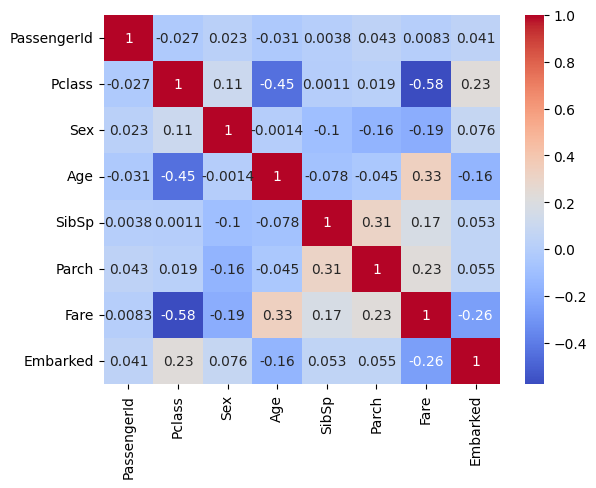

In [ ]:
sns.heatmap(train_dataset.df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
class TitanicNN(nn.Module):
    ...